# **Mount drive and import libraries**

*   mount drive with Google Colab and Get your Authentication Key
*   change directory to E2Edata folder







In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/E2Edata')  # Fix This if your file is in a Certain Directory in Your Drive

Mounted at /content/drive/


**Import important libraries**

In [ ]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from  sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV


# **Date Loading**

Concrete Compressive Strength.
Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)


1.   Load The Data File named by ''Concrete_Data.xlsx'
2.   preperaing Data







In [ ]:
df=pd.read_excel('Concrete_Data.xlsx')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


Hint:
1.  Number of instances - 1030
2.  Number of Attributes - 9 (8 input features, 1 output)


Simplifying Column names

In [ ]:
df=pd.read_excel('Concrete_Data.xlsx', header = None, names=['Cement', 'Blast_Furnace_Slag', 'Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine Aggregate','Age','Concrete_compressive_strength'])
df.drop(df.index[0], inplace=True)
df

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine Aggregate,Age,Concrete_compressive_strength
1,540,0,0,162,2.5,1040,676,28,79.986111
2,540,0,0,162,2.5,1055,676,28,61.887366
3,332.5,142.5,0,228,0,932,594,270,40.269535
4,332.5,142.5,0,228,0,932,594,365,41.05278
5,198.6,132.4,0,192,0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1026,276.4,116,90.3,179.6,8.9,870.1,768.3,28,44.284354
1027,322.2,0,115.6,196,10.4,817.9,813.4,28,31.178794
1028,148.5,139.4,108.6,192.7,6.1,892.4,780,28,23.696601
1029,159.1,186.7,0,175.6,11.3,989.6,788.9,28,32.768036


Checking for 'null' values , and Count missing values in each column

In [ ]:
df.isna().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64

Note : There are no null values in the data.

check type of features

In [ ]:
df.dtypes

Cement                           object
Blast_Furnace_Slag               object
Fly_Ash                          object
Water                            object
Superplasticizer                 object
Coarse_Aggregate                 object
Fine Aggregate                   object
Age                              object
Concrete_compressive_strength    object
dtype: object

* changeing Cement, Blast_Furnace_Slag ,Fly_Ash,Water ,Coarse_Aggregate ,Fine Aggregate ,Concrete_compressive_strength and Superplasticizer from object to float
* changeing Age from object to int

In [ ]:
df[['Cement', 'Blast_Furnace_Slag', 'Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine Aggregate','Concrete_compressive_strength']] = df[['Cement', 'Blast_Furnace_Slag', 'Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine Aggregate','Concrete_compressive_strength']].astype("float")
df[['Age']] = df[['Age']].astype("int")
df.dtypes

Cement                           float64
Blast_Furnace_Slag               float64
Fly_Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse_Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete_compressive_strength    float64
dtype: object

Describe and explore dataset

In [ ]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine Aggregate,Age,Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 1 to 1030
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 80.5 KB


plotting the heatmap Correlation coefficients between the features.


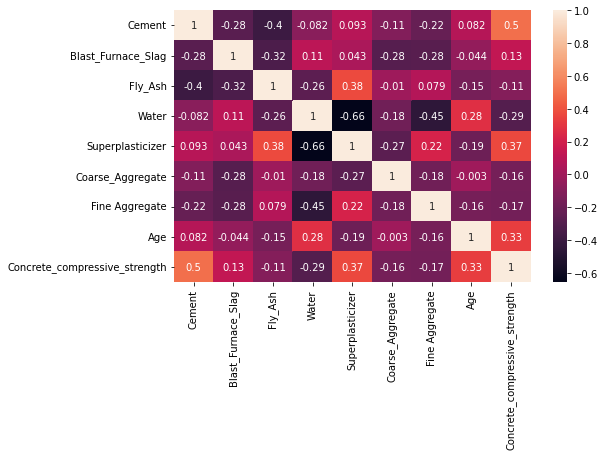

In [ ]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(),annot=True)

**Observations**


*   Cement , Age and Super plasticizer are strongly positive correlated with Compressive Strength
*   Compressive Strength seems to have a negative high correlation with water, Fly ash and Fine aggregate

*   coarse aggregate has the lowst correlation with all features , we can drop it if we need


In [ ]:
df.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine Aggregate,Age,Concrete_compressive_strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast_Furnace_Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly_Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse_Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete_compressive_strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


Checking the pairwise relations of Features.

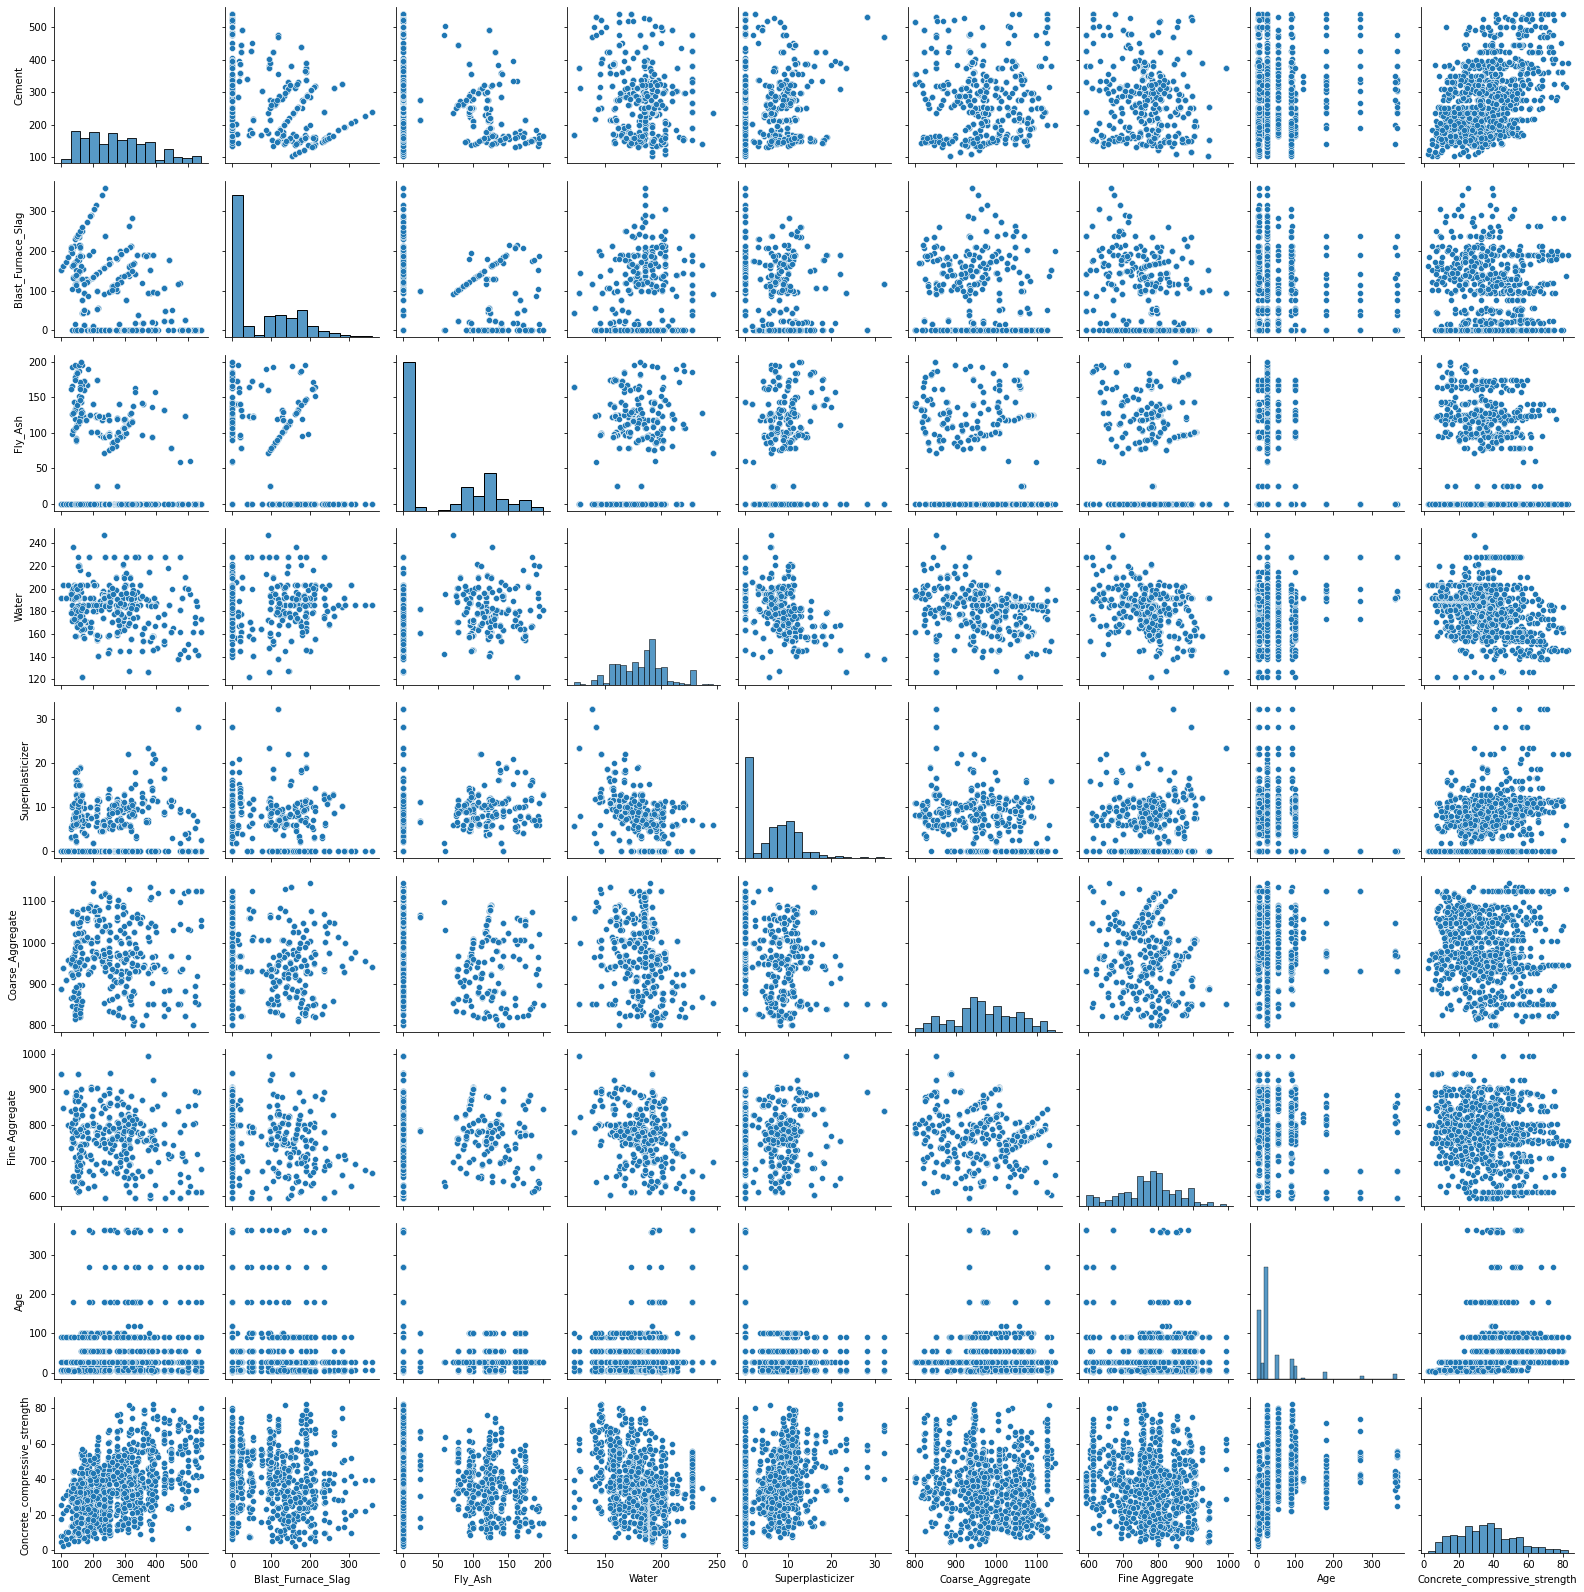

In [ ]:
sns.pairplot(df)

**Observations**
*   Compressive strength increases with cement
*   Compressive strength increases with age
*   Compressive strength increases with super plasticizer
*   Concrete Compressive strength increases when less water is used
*   Flyash increases the strength decreases


Checking for duplicated data

In [ ]:
d = df[df.duplicated()]
d

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine Aggregate,Age,Concrete_compressive_strength
78,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
81,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
87,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
89,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
92,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
101,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
104,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
110,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
112,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
124,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


droping the duplicated dates and keep only the first one.

In [ ]:
df.drop_duplicates(keep='first',inplace=True)
df

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine Aggregate,Age,Concrete_compressive_strength
1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
2,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
4,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1026,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1027,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1028,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1029,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


After removing duplicated datas
* Number of instances - 1005
* Still Number of Attributes - 9 (8 input features, 1 output)
we didn't drop any features
*NOW we will start processing the data and feed it to linear Regression models.

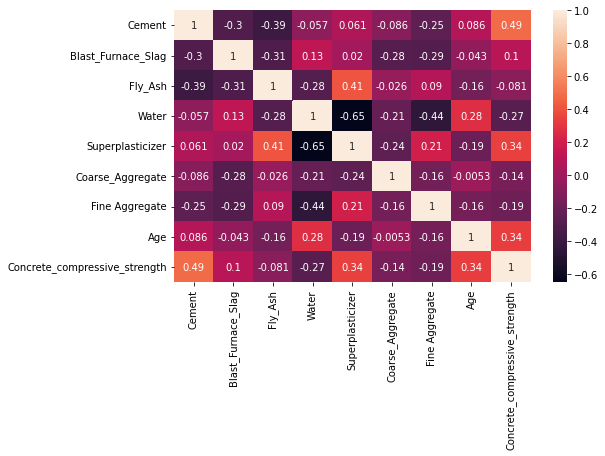

In [ ]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(),annot=True)

# **Data Spliting**

1.   Split training and Testing Data
2.   run the shuffle with Fix the Seed


In [ ]:
x = df.drop(['Concrete_compressive_strength'],axis = 1)
y = df['Concrete_compressive_strength']
print('The size of X :', x.shape )
print('The size Y :',  y.shape )

The size of X : (1005, 8)
The size Y : (1005,)


In [ ]:
x_train,x_test,y_train , y_test = train_test_split(x,y , test_size =0.3 , random_state=0  )

3. Check the Type and Size of the Arrays you created by Printing them

In [ ]:
print('The Features to be trained on :', x_train.shape )
print('The Labels to be trained on :',  y_train.shape )
print('The Features to be tested on :',  x_test.shape )
print('The Labels to be tested on :',  y_test.shape )
print('X_train type : ', type(x_train), 'X_test type :',type(x_test) ,'y_train type :', type(y_train), 'y_test type :', type(y_test) )

The Features to be trained on : (703, 8)
The Labels to be trained on : (703,)
The Features to be tested on : (302, 8)
The Labels to be tested on : (302,)
X_train type :  <class 'pandas.core.frame.DataFrame'> X_test type : <class 'pandas.core.frame.DataFrame'> y_train type : <class 'pandas.core.series.Series'> y_test type : <class 'pandas.core.series.Series'>


**Scaling**
Standardizing the data, to rescale the features to have a mean of zero and standard deviation of 1

In [ ]:
# Feature Scaling
sc = StandardScaler()
x_train_nor = sc.fit_transform(x_train)
x_test_nor= sc.transform(x_test)

## **Linear Regressors Models**
1. Linear regression
2. Lasso regression
3. Ridge regression
4. K - Nearest Neighbours

# **1- Using The Linear Regression Model**

1.1 :fit and predict Model

In [ ]:
lr = LinearRegression()
#Fit the Model to Training Set
lr.fit(x_train_nor,y_train)
#Predict The Training Set
train_preds_lr = lr.predict(x_train_nor)
#Predict The Testing Set
test_preds_lr = lr.predict(x_test_nor)
#Evaluate the Model by R squared method between Preds and Actual Valuees
print(r2_score(y_train,train_preds_lr))
print(r2_score(y_test,test_preds_lr))

0.5975061138028368
0.6039318134361757


**Enhanceing Linear Rregression Model usiong poly features and features Scalling**
1. Build a Code that Try 10 Degrees like from Degree 1 to 10 And Return The Best Degree with the Highest R Squared Value





In [ ]:
RSS=[]
for deg in range(1,10):
    #Fit and Transform the Training Features into Poly Training Features
    poly=PolynomialFeatures(degree = deg)
    x_poly=poly.fit_transform(x_train_nor)
    #Transfrom The Testing Features into Poly Testing Feature
    x_poly_test=poly.transform(x_test_nor)
    #Fit the Model to Training Set
    lp=LinearRegression()
    lp.fit(x_poly,y_train)
    #Predict The Testing Set
    lp_preds=lp.predict(x_poly_test)
    #Evaluate the Model by R squared method between Preds and Actual Valuees
    r2=r2_score(y_test , lp_preds)
    RSS.append(r2)
#The Best Degree with the Highest R Squared Value
max_value = max(RSS)
index = RSS.index(max(RSS))
print('the Max R squared method is' , max_value )
index_deg=index+1
print('the best degree is' ,index_deg )

the Max R squared method is 0.8859266422843679
the best degree is 3


In [ ]:
#Fit and Transform the Training Features into Poly Training Features
poly=PolynomialFeatures(degree = index_deg)
x_poly=poly.fit_transform(x_train_nor)
#Transfrom The Testing Features into Poly Testing Feature
x_poly_test=poly.transform(x_test_nor)
#Fit the Model to Training Set
lp=LinearRegression()
lp.fit(x_poly,y_train)
#Predict The Training Set
train_preds_lp = lp.predict(x_poly)
#Predict The Testing Set
test_preds_lp = lp.predict(x_poly_test)
#Evaluate the Model by R squared method between Preds and Actual Valuees
print(r2_score(y_train,train_preds_lp))
print(r2_score(y_test,test_preds_lp))

0.928826094451958
0.8859266422843679


# **2.Using Ridge Model**

 Set Range Of Alphas and Make A function to Select the Best One with resepct to R Squared Metric

In [ ]:
lrg=Ridge()
param = {'alpha':[0.001,0.01,0.1,1,5,10,100]}
gs_r = GridSearchCV(lrg,param_grid=param,n_jobs=-1,verbose=4)
#Fit the Model to Training Set
gs_r.fit(x_train_nor,y_train)
#Predict The Training Set
train_preds_r = gs_r.predict(x_train_nor)
#Predict The Testing Set
test_preds_r = gs_r.predict(x_test_nor)
#Evaluate the Model by R squared method between Preds and Actual Valuees
print(r2_score(y_train,train_preds_r))
print(r2_score(y_test,test_preds_r))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
0.5974646169930202
0.6045381105415075


In [ ]:
alpha_r=gs_r.best_params_
alpha_r=alpha_r['alpha']

In [ ]:
gs_r.best_estimator_

Ridge(alpha=1)

In [ ]:
RS=[]
for deg in range(1,10):
    #Fit and Transform the Training Features into Poly Training Features
    poly=PolynomialFeatures(degree = deg)
    x_poly=poly.fit_transform(x_train_nor)
    #Transfrom The Testing Features into Poly Testing Feature
    x_poly_test=poly.transform(x_test_nor)
    #Fit the Model to Training Set
    rg=Ridge(alpha=alpha_r)
    rg.fit(x_poly,y_train)
    #Predict The Testing Set
    rg_preds=rg.predict(x_poly_test)
    #Evaluate the Model by R squared method between Preds and Actual Valuees
    r2=r2_score(y_test , rg_preds)
    RS.append(r2)
#The Best Degree with the Highest R Squared Value
max_value = max(RS)
index_r = RS.index(max(RS))
print('the Max R squared method for Ridge is' , max_value )
index_ridge=index_r+1
print('the best degree is' ,index_ridge )

the Max R squared method for Ridge is 0.8763079553288996
the best degree is 3


In [ ]:
#Fit and Transform the Training Features into Poly Training Features
poly=PolynomialFeatures(degree = index_ridge)
x_poly=poly.fit_transform(x_train_nor)
#Transfrom The Testing Features into Poly Testing Feature
x_poly_test=poly.transform(x_test_nor)
#Fit the Model to Training Set
lrp=Ridge(alpha=alpha_r)
lrp.fit(x_poly,y_train)
#Predict The Training Set
train_preds_lrp = lrp.predict(x_poly)
#Predict The Testing Set
test_preds_lrp = lrp.predict(x_poly_test)
#Evaluate the Model by R squared method between Preds and Actual Valuees
print( r2_score(y_train,train_preds_lrp))
print( r2_score(y_test,test_preds_lrp))


0.9232142556938661
0.8763079553288996


# **3.Using Lasso Model**

Set Range Of Alphas and Make A function to Select the Best One with resepct to R Squared Metric

In [ ]:
la=Lasso()
param = {'alpha':[0.001,0.01,0.1,1,5,10,100]}
gs_l = GridSearchCV(la,param_grid=param,n_jobs=-1,verbose=4)
#Fit the Model to Training Set
gs_l.fit(x_train_nor,y_train)
#Predict The Training Set
train_preds_l = gs_l.predict(x_train_nor)
#Predict The Testing Set
test_preds_l = gs_l.predict(x_test_nor)
#Evaluate the Model by R squared method between Preds and Actual Valuees
print(r2_score(y_train,train_preds_l))
print(r2_score(y_test,test_preds_l))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
0.5975056995095336
0.6040053256971434


In [ ]:
alpha_l=gs_l.best_params_
alpha_l=alpha_l['alpha']

In [ ]:
gs_l.best_estimator_

Lasso(alpha=0.001)

In [ ]:
las=[]
for deg in range(1,10):
    #Fit and Transform the Training Features into Poly Training Features
    poly=PolynomialFeatures(degree = deg)
    x_poly=poly.fit_transform(x_train_nor)
    #Transfrom The Testing Features into Poly Testing Feature
    x_poly_test=poly.transform(x_test_nor)
    #Fit the Model to Training Set
    la=Lasso(alpha=alpha_l)
    la.fit(x_poly,y_train)
    #Predict The Testing Set
    la_preds=la.predict(x_poly_test)
    #Evaluate the Model by R squared method between Preds and Actual Valuees
    r2=r2_score(y_test , la_preds)
    las.append(r2)
#The Best Degree with the Highest R Squared Value
max_value = max(las)
index_l = las.index(max(las))
print('the Max R squared method for Lasso is' , max_value )
index_lasso=index_l+1
print('the best degree is' ,index_lasso )

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.405e+03, tolerance: 1.862e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.169e+03, tolerance: 1.862e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.619e+03, tolerance: 1.862e+01

the Max R squared method for Lasso is 0.875237645973335
the best degree is 3


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.384e+03, tolerance: 1.862e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#Fit and Transform the Training Features into Poly Training Features
poly=PolynomialFeatures(degree = index_lasso)
x_poly=poly.fit_transform(x_train_nor)
#Transfrom The Testing Features into Poly Testing Feature
x_poly_test=poly.transform(x_test_nor)
#Fit the Model to Training Set
lap=Lasso(alpha=alpha_l)
lap.fit(x_poly,y_train)
#Predict The Training Set
train_preds_lap = lap.predict(x_poly)
#Predict The Testing Set
test_preds_lap = lap.predict(x_poly_test)
#Evaluate the Model by R squared method between Preds and Actual Valuees
print( r2_score(y_train,train_preds_lap))
print( r2_score(y_test,test_preds_lap))

0.9242058184980909
0.875237645973335


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.169e+03, tolerance: 1.862e+01
  model = cd_fast.enet_coordinate_descent(


# **4.Using K - Nearest Neighbours Model**


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh =KNeighborsRegressor()
param = {'n_neighbors':[3,5,7,11]}
gs_kn = GridSearchCV(neigh,param_grid=param,n_jobs=-1,verbose=4)
#Fit the Model to Training Set
gs_kn.fit(x_train_nor,y_train)
#Predict The Training Set
train_preds_kn = gs_kn.predict(x_train_nor)
#Predict The Testing Set
test_preds_kn = gs_kn.predict(x_test_nor)
#Evaluate the Model by R squared method between Preds and Actual Valuees
print(r2_score(y_train,train_preds_kn))
print(r2_score(y_test,test_preds_kn))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.7926718453201604
0.6693602723135533


In [ ]:
kn_n=gs_kn.best_params_
kn_n=kn_n['n_neighbors']

In [ ]:
gs_kn.best_params_

{'n_neighbors': 5}

In [ ]:
kn=[]
for deg in range(1,10):
    #Fit and Transform the Training Features into Poly Training Features
    poly=PolynomialFeatures(degree = deg)
    x_poly=poly.fit_transform(x_train_nor)
    #Transfrom The Testing Features into Poly Testing Feature
    x_poly_test=poly.transform(x_test_nor)
    #Fit the Model to Training Set
    neigh =KNeighborsRegressor(n_neighbors=kn_n)
    neigh.fit(x_poly,y_train)
    #Predict The Testing Set
    la_preds=neigh.predict(x_poly_test)
    #Evaluate the Model by R squared method between Preds and Actual Valuees
    r2=r2_score(y_test , la_preds)
    kn.append(r2)
#The Best Degree with the Highest R Squared Value
max_value = max(kn)
index_kn = kn.index(max(kn))
print('the Max R squared method for Lasso is' , max_value )
index_knn=index_kn+1
print('the best degree is' ,index_knn )

the Max R squared method for Lasso is 0.6786588343927449
the best degree is 2


In [ ]:
#Fit and Transform the Training Features into Poly Training Features
poly=PolynomialFeatures(degree = index_knn)
x_poly=poly.fit_transform(x_train_nor)
#Transfrom The Testing Features into Poly Testing Feature
x_poly_test=poly.transform(x_test_nor)
#Fit the Model to Training Set
neigh =KNeighborsRegressor(n_neighbors=kn_n)
neigh.fit(x_poly,y_train)
#Predict The Training Set
train_preds_k = neigh.predict(x_poly)
#Predict The Testing Set
test_preds_k = neigh.predict(x_poly_test)
#Evaluate the Model by R squared method between Preds and Actual Valuees
print( r2_score(y_train,train_preds_k))
print( r2_score(y_test,test_preds_k))

0.7867772119172218
0.6786588343927449


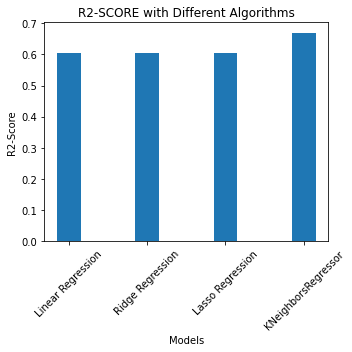

In [ ]:
models = [lr,gs_r, gs_l,gs_kn ]
names = ["Linear Regression","Ridge Regression",
         "Lasso Regression","KNeighborsRegressor" ]
r2 = []
x_train_nor = sc.fit_transform(x_train)
x_test_nor= sc.transform(x_test)

for model in models:
    r2.append((r2_score(y_test, model.predict(x_test_nor))))

x = np.arange(len(names))
width = 0.3

fig, ax = plt.subplots(figsize=(5,5))
rects = ax.bar(x, r2, width)
ax.set_ylabel('R2-Score')
ax.set_xlabel('Models')
ax.set_title('R2-SCORE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
fig.tight_layout()
plt.show()

# **Results**

**KNeighbors Regressor** is the best choice for this problem with R2-score = 67.8%

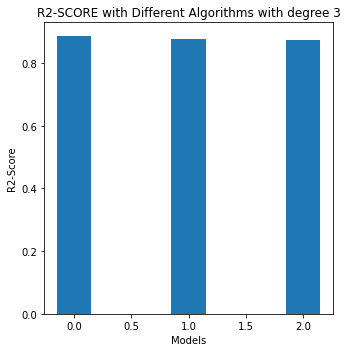

In [ ]:
models = [lp , lrp, lap ]
names = ["Linear Regression" ,"Ridge Regression",
         "Lasso Regression"]
r2 = []
poly=PolynomialFeatures(degree = 3)
x_poly=poly.fit_transform(x_train_nor)
#Transfrom The Testing Features into Poly Testing Feature
x_poly_test=poly.transform(x_test_nor)

for model in models:
    r2.append((r2_score(y_test, model.predict(x_poly_test))))

x = np.arange(len(names))
width = 0.3

fig, ax = plt.subplots(figsize=(5,5))
rects = ax.bar(x, r2, width)
ax.set_ylabel('R2-Score')
ax.set_xlabel('Models')
ax.set_title('R2-SCORE with Different Algorithms with degree 3')
#ax.set_xticks(x)
#ax.set_xticklabels(names, rotation=45)
fig.tight_layout()
plt.show()

# **Results**
**BY using poly features with degree 3**

**Linear Regressor** is the best choice for this problem.with R2-SCORE=88.59%

We can repeat all those steps with drop ['Coarse_Aggregate'] feature

# **GOOD LUCK**

In [ ]:
df.drop(['Coarse_Aggregate'],axis = 1, inplace= True)
df

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Fine Aggregate,Age,Concrete_compressive_strength
1,540.0,0.0,0.0,162.0,2.5,676.0,28,79.986111
2,540.0,0.0,0.0,162.0,2.5,676.0,28,61.887366
3,332.5,142.5,0.0,228.0,0.0,594.0,270,40.269535
4,332.5,142.5,0.0,228.0,0.0,594.0,365,41.052780
5,198.6,132.4,0.0,192.0,0.0,825.5,360,44.296075
...,...,...,...,...,...,...,...,...
1026,276.4,116.0,90.3,179.6,8.9,768.3,28,44.284354
1027,322.2,0.0,115.6,196.0,10.4,813.4,28,31.178794
1028,148.5,139.4,108.6,192.7,6.1,780.0,28,23.696601
1029,159.1,186.7,0.0,175.6,11.3,788.9,28,32.768036
